# Machine Learning
---

## IMD0104 - Aprendizado de máquina
### Professor Dr. João Carlos
### Team
- Marco Olimpio - marco.olimpio at gmail.com
- Rebecca Betwel - bekbetwel at gmail.com

---

### First, lets configure the notebook and load the dataset

#### Configuring the environment

In [12]:
!pip install cufflinks

Downloading/unpacking cufflinks
  Cannot fetch index base URL https://pypi.python.org/simple/
  Could not find any downloads that satisfy the requirement cufflinks
Cleaning up...
No distributions at all found for cufflinks
Storing debug log for failure in /Users/marco/Library/Logs/pip.log


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'cufflinks'

#### Loading the dataset for the assignment

The dataset was publicezed in a comma separeted value format, so utilizing the function read_csv we could load the dataset!
Below we have a sample of the original data, ten tuples.

In [62]:
df = pd.read_csv('./db/googleplaystore.csv')

So, according to the description of the dataset as well as the descriptions of the columns we do have a dataset with informtion about the Google Play Store, we could apply many algorithms since we do have a great variaty of tuples, more than 10k, and 13 features.

# 1. Introduction 

Our consulting firm has received a request to discover the most probable kind of mobile app that our client should concentrate efforts to maximize the return on investment. As the first glimpse, we considered the data from Google Play platform to make this study where were considered the lower break in point in terms of mobile products. 

Therefore, we have acquired a very unique dataset with more than ten thousand instances and more than ten features from Google Store Platform to make the analysis of the next killer app.


## 1.1 The dataset

The dataset is a collection of Google Play Store and there is a good variaty of information about number of installations, the genre of the application, the reviews and other features making 13 features total and we do have about eleven thousand information of apps from the mobile platform.

So, now, lets embrance what data we do have in the data set, lets take a sample below:

In [63]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5295,AK47 Assault Rifle,TOOLS,3.9,54,2.8M,"10,000+",Free,0,Everyone,Tools,"May 2, 2015",1.0.0.1,2.2 and up
5312,Shoot Strike War Fire,GAME,4.1,82827,20M,"10,000,000+",Free,0,Teen,Arcade,"July 13, 2018",1.1.5,4.0 and up
762,Learn HTML,EDUCATION,4.7,61749,5.4M,"1,000,000+",Free,0,Everyone,Education,"December 25, 2017",5.5.2,4.0 and up
4723,Fantasy Squad W,FAMILY,4.3,2142,47M,"50,000+",Free,0,Everyone 10+,Role Playing,"April 16, 2018",1.5.4,4.1 and up
1861,Summoners War,GAME,4.3,2045554,28M,"50,000,000+",Free,0,Teen,Role Playing,"July 30, 2018",4.0.1,4.0.3 and up
3443,"iKeyboard - emoji, emoticons",PERSONALIZATION,4.5,624924,24M,"10,000,000+",Free,0,Everyone,Personalization,"August 1, 2018",4.8.2.2195,4.1 and up
9558,El Dorado App,TRAVEL_AND_LOCAL,4.4,221,33M,"10,000+",Free,0,Everyone,Travel & Local,"April 6, 2018",2.4,4.1 and up
4438,OO Launcher for Android O 8.0 Oreo™ Launcher,PERSONALIZATION,4.4,14832,8.6M,"1,000,000+",Free,0,Everyone,Personalization,"August 3, 2018",4.6,4.0 and up
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
848,SoloLearn: Learn to Code for Free,EDUCATION,4.8,256079,7.6M,"1,000,000+",Free,0,Teen,Education,"July 12, 2018",2.2.4,4.0.3 and up


we could check that our dataset presents 10.841 tuples


In [64]:
len(df)

10841

and 13 columns/features

In [65]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Where each column/feature represents:
- App - The name of the application
- Category - The category of the application
- Rating - The rate given by the users
- Reviews - The number of reviews given by the users
- Size - The size of the application
- Installs - Number of installs
- Type - If the application is paid or free
- Price - The price charged
- Content Rating - The age rating
- Genres - The kind of category of the application
- Last updated - The date when it was last updated
- Current ver - The current version number, the last version number
- Android ver - The minimun android compatible version

Now lets see what each dataset feature presents in terms of its data, like the range of the data, the categories it has and etc.

## 1.2 Data exploration

### 1.2.1 Pre-processing

In this section we try to adjust de data from our dataset. Why do we need to do that? Because with bad data we could not get good results, simple as that. 

So what do we need to do? First step to proceed is to:
- remove all missing data; 
- check for outliers; and 
- normalize our data

All these steps are following the assignment description.

But we need to put some more effort to this dataset, like
- removing duplicate tuples/instances, in this case, duplicate apps
- check for strange data, for instance the Installs feature should only appear with 'Free' or 'Paid'
- check Android version to be a valid number
- convert size for MB
- remove strange caracters
- cast data to the appropriate data type ,eg. string to int;


In [66]:
df.drop_duplicates(subset='App', inplace=True)

df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']

df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

So, analysing the number of 'missing' data we have

In [67]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Size,1227,0.127032
Current Ver,8,0.000828
Android Ver,2,0.000207
Type,1,0.000104
Last Updated,0,0.000000


And we need to take action about this situation droping all instances with missing values from our dataset

In [68]:
df.dropna(how ='any', inplace = True)

Checking the result of this operation we conclude with less number of instances:

In [69]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [70]:
print(len(df))

7021


#### Fiding
Now we have only 7021 instances, or, a reduction of about:

In [71]:
10841 - 7021

3820

In [72]:
df["Price"].describe()

count    7021.000000
mean        1.174222
std        18.205355
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

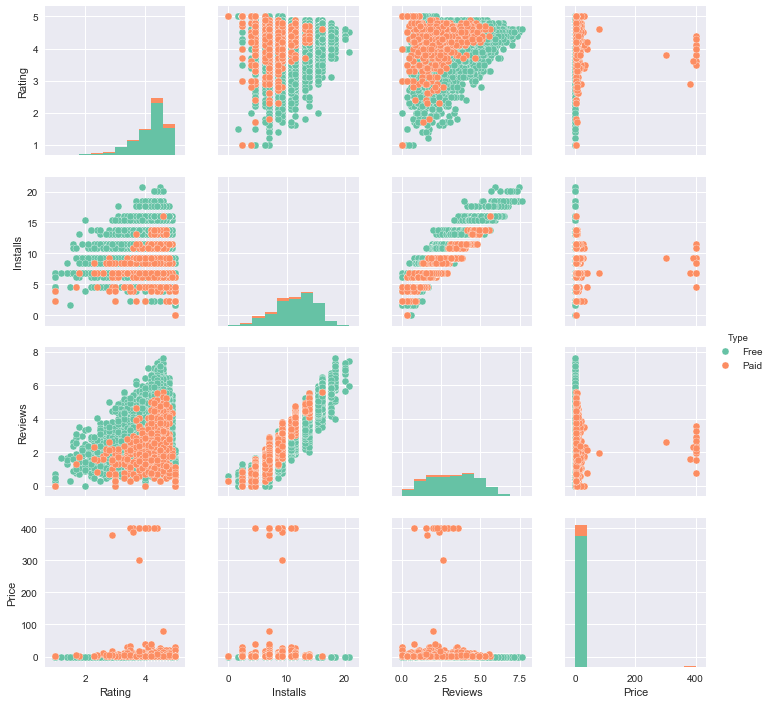

In [73]:
x = df['Rating'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [74]:
print("\n", df['Category'].unique())


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [80]:
print(df["Genres"])

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
6                     Art & Design
7                     Art & Design
8                     Art & Design
9          Art & Design;Creativity
10                    Art & Design
11                    Art & Design
12                    Art & Design
13                    Art & Design
14                    Art & Design
16                    Art & Design
17                    Art & Design
18                    Art & Design
19                    Art & Design
20                    Art & Design
21                    Art & Design
22                    Art & Design
24                    Art & Design
25                    Art & Design
26         Art & Design;Creativity
27                    Art & Design
28                    Art & Design
29                    Art & Design
30                  

# 1.Pre processing

In this very first part of data analysis the assignment requested for three sort of pre processing techniques, as follows:
- Remove missing values
- Aliasing data
- Put data in a same scale, aka. normalization


# 2.Processing

## 2.1 Non supervised algorithms

## 2.2 Supervised algorithms

# 3.Post processing

In this section we analyse the results of all tested algorithms.

In [ ]:
SE